In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.feature_selection import RFE

In [2]:
df=pd.read_excel('mtcars..xlsx')

In [3]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
df.skew()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6920\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


mpg     0.672377
cyl    -0.192261
disp    0.420233
hp      0.799407
drat    0.292780
wt      0.465916
qsec    0.406347
vs      0.264542
am      0.400809
gear    0.582309
carb    1.157091
dtype: float64

In [7]:
df.kurt()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_6920\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


mpg    -0.022006
cyl    -1.762794
disp   -1.067523
hp      0.275212
drat   -0.450432
wt      0.416595
qsec    0.864931
vs     -2.063273
am     -1.966550
gear   -0.895292
carb    2.020059
dtype: float64

<AxesSubplot:>

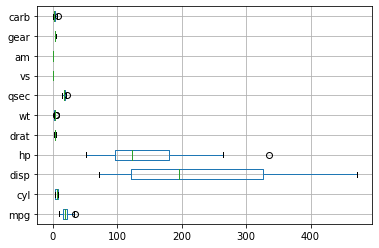

In [8]:
df.boxplot(vert=False)

In [9]:
def remove_outlier(col):
    sorted(col)
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    LW=q1-(1.5*IQR)
    UW=q3+(1.5*IQR)
    return LW,UW

In [10]:
for column in df.drop(['mpg','model'],axis=1).columns:  #for loop iterates all columns one by one
    LW,UW=remove_outlier(df[column])
    df[column]=np.where(df[column]>UW,UW,df[column])
    df[column]=np.where(df[column]<LW,LW,df[column])

<AxesSubplot:>

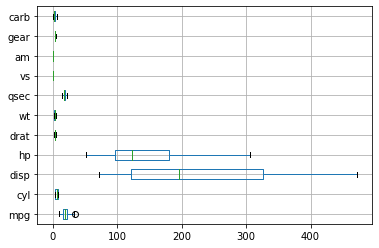

In [11]:
df.boxplot(vert=False)

In [12]:
X=df.drop(['model','mpg'],axis=1)
y=df['mpg']

In [13]:
X.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
1,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
2,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
3,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
4,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0


In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [15]:
model=LinearRegression()

In [16]:
model.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred=model.predict(X_test)

In [18]:
r2_score(y_test,y_pred)

0.7060859249624583

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

4.626512273850737

##  RFE

In [22]:
rfe = RFE(estimator = LinearRegression())

In [23]:
rfe.fit(X,y)

RFE(estimator=LinearRegression())

In [24]:
rfe.support_

array([False, False, False,  True,  True,  True,  True,  True, False,
       False])

In [25]:
X.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [27]:
X_rfe = X[['drat','wt','qsec','vs','am']]

In [28]:
X_rfe_train,X_rfe_test,y_train,y_test=train_test_split(X_rfe,y,test_size=0.3,random_state=1)

In [29]:
X_rfe_train.head()

,drat,wt,qsec,vs,am
24,3.08,3.845,17.05,0.0,0.0
10,3.92,3.440,18.90,1.0,0.0
20,3.70,2.465,20.01,1.0,0.0
26,4.43,2.140,16.70,0.0,1.0
4,3.15,3.440,17.02,0.0,0.0


In [31]:
model=LinearRegression()

In [32]:
model.fit(X_rfe_train,y_train)

LinearRegression()

In [33]:
y_pred=model.predict(X_rfe_test)

In [34]:
r2_score(y_test,y_pred)

0.7428985903763503